importing dependencies

# New Section

In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

data collection and analysis

In [51]:
#loading diabetes dataset into pandas dataframe
diabetes_dataset1 = pd.read_csv("/content/diabetes-dataset[1].csv")

In [52]:
#printing first 5 rows of dataset
diabetes_dataset1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [53]:
#no of rows and columns
diabetes_dataset1.shape

(2000, 9)

In [54]:
#statistical data
diabetes_dataset1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [55]:
diabetes_dataset1['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [56]:
diabetes_dataset1.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307
1,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140


In [57]:
df1 = diabetes_dataset1[diabetes_dataset1.Outcome!=1]
df1.drop(df1.index[1:684], axis=0, inplace=True)
df1.shape

<ipython-input-57-441b5cb04461>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1.index[1:684], axis=0, inplace=True)


(633, 9)

In [58]:
df2 = diabetes_dataset1[diabetes_dataset1.Outcome!=0]
frames = [df1,df2]

diabetes_dataset = pd.concat(frames)
display(diabetes_dataset)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0,84,82,31,125,38.2,0.233,23,0
1025,4,154,72,29,126,31.3,0.338,37,0
1027,3,78,70,0,0,32.5,0.270,39,0
1028,2,130,96,0,0,22.6,0.268,21,0
1029,3,111,58,31,44,29.5,0.430,22,0
...,...,...,...,...,...,...,...,...,...
1986,6,104,74,18,156,29.9,0.722,41,1
1991,6,102,82,0,0,30.8,0.180,36,1
1992,6,134,70,23,130,35.4,0.542,29,1
1996,8,179,72,42,130,32.7,0.719,36,1


In [59]:
diabetes_dataset['Outcome'].value_counts()

1    684
0    633
Name: Outcome, dtype: int64

In [60]:
#seperating data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis =1)
Y = diabetes_dataset['Outcome']

In [61]:
print(X)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1               0       84             82             31      125  38.2   
1025            4      154             72             29      126  31.3   
1027            3       78             70              0        0  32.5   
1028            2      130             96              0        0  22.6   
1029            3      111             58             31       44  29.5   
...           ...      ...            ...            ...      ...   ...   
1986            6      104             74             18      156  29.9   
1991            6      102             82              0        0  30.8   
1992            6      134             70             23      130  35.4   
1996            8      179             72             42      130  32.7   
1998            0      129            110             46      130  67.1   

      DiabetesPedigreeFunction  Age  
1                        0.233   23  
1025                   

In [62]:
print(Y)

1       0
1025    0
1027    0
1028    0
1029    0
       ..
1986    1
1991    1
1992    1
1996    1
1998    1
Name: Outcome, Length: 1317, dtype: int64


In [64]:
diabetes_dataset.shape


(1317, 9)

In [65]:
scaler = StandardScaler()

In [66]:
scaler.fit(X)

StandardScaler()

In [67]:
standardized_data = scaler.transform(X)

In [68]:
print(standardized_data)

[[-1.1504034  -1.30277024  0.62202978 ...  0.61251772 -0.7597138
  -0.94711539]
 [ 0.01437175  0.81383248  0.11842541 ... -0.23139827 -0.44600961
   0.26913433]
 [-0.27682204 -1.48419333  0.01770454 ... -0.08463027 -0.64917042
   0.4428843 ]
 ...
 [ 0.59675933  0.20908885  0.01770454 ...  0.27005906  0.16347281
  -0.42586551]
 [ 1.1791469   1.56976203  0.11842541 ... -0.06016894  0.69228844
   0.18225935]
 [-1.1504034   0.05790294  2.032122   ...  4.14718031 -0.50277513
  -0.68649045]]


In [69]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [70]:
print(X)
print(Y)

[[-1.1504034  -1.30277024  0.62202978 ...  0.61251772 -0.7597138
  -0.94711539]
 [ 0.01437175  0.81383248  0.11842541 ... -0.23139827 -0.44600961
   0.26913433]
 [-0.27682204 -1.48419333  0.01770454 ... -0.08463027 -0.64917042
   0.4428843 ]
 ...
 [ 0.59675933  0.20908885  0.01770454 ...  0.27005906  0.16347281
  -0.42586551]
 [ 1.1791469   1.56976203  0.11842541 ... -0.06016894  0.69228844
   0.18225935]
 [-1.1504034   0.05790294  2.032122   ...  4.14718031 -0.50277513
  -0.68649045]]
1       0
1025    0
1027    0
1028    0
1029    0
       ..
1986    1
1991    1
1992    1
1996    1
1998    1
Name: Outcome, Length: 1317, dtype: int64


Train test split

In [71]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [72]:
print(X.shape,X_train.shape,X_test.shape)

(1317, 8) (1053, 8) (264, 8)


Training model

In [73]:
classifier = svm.SVC(kernel ='linear')

In [74]:
#training svm classifier
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model evaluation

In [75]:
#accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [76]:
print('Accuracy score of training data:', training_data_accuracy)

Accuracy score of training data: 0.7407407407407407


In [77]:
#accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [78]:
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.7840909090909091


In [82]:
y_pred=classifier.predict(X_test)

In [84]:
import sklearn
sklearn.metrics.accuracy_score(Y_test,y_pred)

0.7840909090909091

<Axes: >

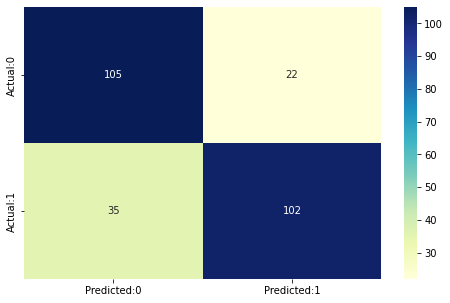

In [87]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
cm=confusion_matrix(Y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

Making predictive system

In [94]:
input_data =(0,84,82,31,125,38.2,0.233,23)

#changing input data as numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize input data
std_data = scaler.transform(input_data_reshaped)


prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print("person is not diabetic")
else:
  print("person is diabetic")

[0]
person is not diabetic


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
import pickle

In [80]:
filename = 'diabetes_final.sav'
pickle.dump(classifier,open(filename,'wb'))

In [81]:
loaded_model = pickle.load(open('diabetes_final.sav','rb'))